# Problem 5: BPE (Byte Pair Encoding)

In [ ]:
# Created by: Rthvik Raviprakash
# Email: rravipra@uw.edu

In [ ]:
import numpy as np
import operator

In [ ]:
filename = "" # your filename of the text document
arr = np.loadtxt(filename, dtype = "str", delimiter = "\n")
arr[0]

'Prague Stock Market falls to minus by the end of the trading day'

In [ ]:
def sent_out(array):
  sent_list = []
  for sent in array:
    for ch in sent:
      if ch == " ":
        sent_list.append("<s>")
      else:
        sent_list.append(ch)
    sent_list.append("<s>")
  
  return sent_list

In [ ]:
s_list = sent_out(arr)

In [ ]:
def get_bi(li):
  di = {}
  for j in range(len(li)- 1):
    if (li[j], li[j+1]) in di:
      di[(li[j], li[j+1])] += 1
    else:
      di[(li[j], li[j+1])] = 1
  
  return di

In [ ]:
bi_grams = {}

In [ ]:
for j in range(len(s_list)-1):
  if (s_list[j], s_list[j+1]) in bi_grams:
    bi_grams[(s_list[j], s_list[j+1])] += 1
  else:
    bi_grams[(s_list[j], s_list[j+1])] = 1

In [ ]:
key = max(bi_grams.items(), key=operator.itemgetter(1))[0]
sub = s_list.copy()
max_val = max(bi_grams.items(), key=operator.itemgetter(1))[1]
x = []
y = []
keys = []
iter = 0
vocab = set(sub)

print(max_val)

while max_val > 1:
  a = []
  idx = 0
  prev = []
  while idx < len(sub) - 1:
    if idx + 1 == len(sub) - 1 and (sub[idx], sub[idx+1]) != key:
      a.append(sub[idx + 1])

    if (sub[idx], sub[idx+1]) == key:
      k_merge = (sub[idx], sub[idx+1])
      merge = sub[idx] + sub[idx+1]
      a.append(merge)      
      idx += 2
    else:
      a.append(sub[idx])
      idx += 1

  bi_grams = get_bi(a)

  sub = a.copy()
  vocab = vocab.union(set(sub))
  key = max(bi_grams.items(), key=operator.itemgetter(1))[0]
  max_val = max(bi_grams.items(), key=operator.itemgetter(1))[1]
  x.append(len(vocab))
  y.append(len(sub))
  keys.append(key)
  iter += 1

  values = list(bi_grams.values())
  count = values.count(max(values))

19877


Text(0.5, 1.0, 'Scatterplot of training corpus size vs current vocabulary size')

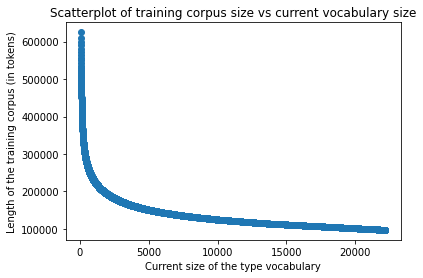

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x,y)
plt.xlabel("Current size of the type vocabulary")
plt.ylabel("Length of the training corpus (in tokens)")
plt.title("Scatterplot of training corpus size vs current vocabulary size")

In [ ]:
s_res = ""

for val in sub:
  s_res += val

In [ ]:
print("The size of the final set of vocabulary:", len(vocab))
print("The size of the final training corpus:", len(sub))

The size of the final set of vocabulary: 22200
The size of the final training corpus: 97297


In [ ]:
path = "/content/drive/MyDrive/BPE_Encode.txt" # The path where you want to share your decoded sentences text file.
with open(path,'w') as writefile:
  writefile.write(s_res)

In [ ]:
path_1 = "/content/drive/MyDrive/xy_1.txt" # The path where you want to share your decoded sentences text file.
with open(path_1,'w') as writefile:
  writefile.write(str(x))
  writefile.write("\n")
  writefile.write(str(y))

In [ ]:
path_2 = "/content/drive/MyDrive/Vocab.txt" # The path where you want to share your decoded sentences text file.
with open(path_2,'w') as writefile:
  writefile.write(str(vocab))

In [ ]:
rare = "the phloem"

In [ ]:
rare_word = ""
for i in range(len(rare)):
  if i == len(rare) - 1:
    if rare[i] == " ":
      rare_word += "<s> "
    else:
      rare_word += rare[i]
  else:
    if rare[i] == " ":
      rare_word += "<s> "
    else:
      rare_word += rare[i] + " "

rare_word

't h e <s> p h l o e m'

In [ ]:
for k in keys:
  s = str(k[0]) + " " + str(k[1])
  s1 = str(k[0]) + str(k[1])
  rare_word = rare_word.replace(s, s1)

In [ ]:
res = []
li = rare_word.split()
for w in li:
  if w in vocab:
    res.append(w)
  else:
    res.append("<unk>")

s_result = ""

for j in range(len(res)):
  if j == len(res) - 1:
    s_result += res[j]
  else:
    s_result += res[j] + " "

In [ ]:
s_result

'the <s> ph lo em'